## Exploración de regresión lineal iterativa con regularización *Ridge*
### Daniel Espinosa

### Esta tarea contará para las dos entregas de método iterativo, pues si se toma lambda = 0 en la regularización *Ridge* se obtiene el método iterativo convencional

In [306]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

In [271]:
df = pd.read_csv("../RegresionLineal/regLinPoli.csv",header=0)
df.describe()

,X,X2,X3,X4,X5,y
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,48.052380,3113.669342,1.542203,-0.011250,628.000000,3113.490528
std,28.379936,2891.956247,0.452374,0.717016,297.191016,2892.963581
min,0.006314,0.000040,-2.199666,-0.999993,114.000000,0.000040
25%,23.174764,537.069692,1.365015,-0.731530,371.000000,522.757565
50%,47.655827,2271.077831,1.678116,-0.046938,628.000000,2262.728789
75%,71.372550,5094.040864,1.853531,0.732296,885.000000,5093.260718
max,99.873062,9974.628611,1.999448,1.000000,1142.000000,10028.067820


In [272]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

#conversion a matrices (hace la vida mas facil pues no salen de la nada panda objects imprevistos, AKA: panditas)
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

In [273]:
#estandarizacion de los datos
scaler = StandardScaler().fit(X_trainM)
X_trainM=scaler.transform(X_trainM)
X_testM=scaler.transform(X_testM)

In [274]:
#Definimos un valor para eta y lambda, por ahora 0.01
eta = 0.01
lmbd = 0.01

In [275]:
#Le pasamos el arreglo de ws y la tupla Xi en cuestion
def Vest(ws, Xi):
    v = ws[0]
    for i in range(len(Xi)):
        v += Xi[i]*ws[i+1]
    
    return v

In [276]:
#eta es la constante, Yi el valor real de Y para la tupla i, Vi el valor de la prediccion para la tupla i
def calcErrorW0(eta,Yi,Vi):
    errw0 = (eta*(Yi-Vi))
    return errw0

In [277]:
def calcErrorWi(eta,Yi,Vi,Xi):
    errorwi = []
    for i in range(0,len(Xi)):
        errorwi.append(eta*(Yi-Vi)*Xi[i])
    return errorwi

In [278]:
def iterate(wi,X,Y,eta,lmbd):
    #init
    arreTempW = []
    V = Vest(wi,X[0])
    errw0 = calcErrorW0(eta,Y[0],V)
    arreTempW.append(wi[0] + errw0)
    
    errwi = calcErrorWi(eta,Y[0],V,X[0])
    for i in range(1,len(wi)):
        arreTempW.append(wi[i] + errwi[i-1] - lmbd*wi[i])
        
    
    #miniupdate
    wi = arreTempW #Actualizamos la primera iteracion de los coeficientes
    
        
    
    #calculate
    for i in range(1,len(X)):
        V = Vest(wi,X[i])
        errw0 = calcErrorW0(eta,Y[i],V)
        arreTempW[0] = (wi[0] + errw0)
        
        errwi = calcErrorWi(eta,Y[i],V,X[i])
        for j in range(1,len(wi)):
            arreTempW[j] = (wi[j] + errwi[j-1] - (lmbd*wi[j]))
    
        
        
        #update
        wi = arreTempW
    
    return wi
        

Creamos el arreglo para los w (serán 6 en total, de w0 a w5)

In [297]:
arreW = []
#Inicializamos los coeficientes en numeros aleatorios entre -5 y 5 (why not?)

arreW = (np.random.rand(6)*10) - 5
arreW

array([ 0.49208003, -2.1733151 , -1.60469105, -2.69642727, -4.18494859,
       -4.03064195])

Lo corremos.... godspeed....

In [298]:
arreW = iterate(arreW,X_trainM,Y_trainM,0.02,0)

In [299]:
arreW

[3167.3254581021847,
 1102.1603197455195,
 2114.8757207050962,
 -378.57744319435477,
 -13.691355954107376,
 3.1281147539395264]

In [300]:
Y_predict = np.zeros(len(X_trainM))
for i in range(len(X_trainM)):
    Y_predict[i] = Vest(arreW,X_trainM[i])

Veamos las gráficas para cada variable de X (todo con entrenamiento) contra su Y correspondiente y en las mismas gráficas la variable correspondiente de X contra la Y de predicción del modelo. 

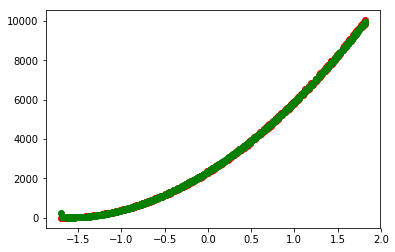

In [406]:
plt.plot(X_trainM[:,0], Y_trainM, 'ro')
plt.plot(X_trainM[:,0], Y_predict, 'go')
plt.show()

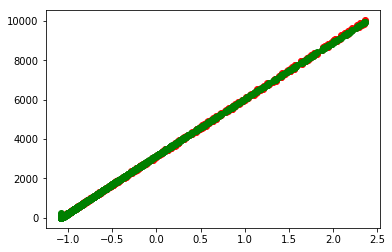

In [407]:
plt.plot(X_trainM[:,1], Y_trainM, 'ro')
plt.plot(X_trainM[:,1], Y_predict, 'go')
plt.show()

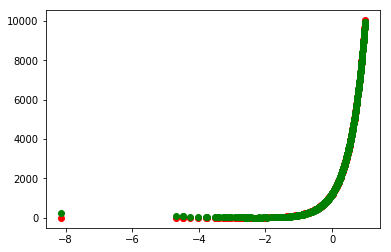

In [408]:
plt.plot(X_trainM[:,2], Y_trainM, 'ro')
plt.plot(X_trainM[:,2], Y_predict, 'go')
plt.show()

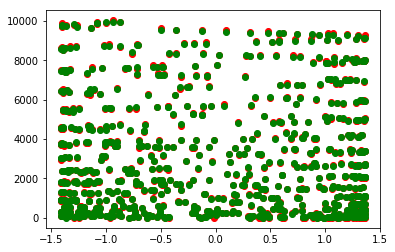

In [409]:
plt.plot(X_trainM[:,3], Y_trainM, 'ro')
plt.plot(X_trainM[:,3], Y_predict, 'go')
plt.show()

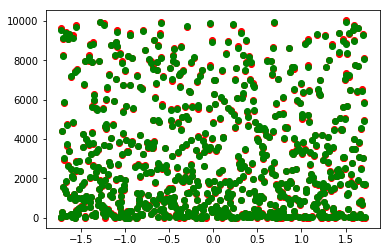

In [410]:
plt.plot(X_trainM[:,4], Y_trainM, 'ro')
plt.plot(X_trainM[:,4], Y_predict, 'go')
plt.show()

En estas gráficas se puede observar que tomando los parámetros eta = 0.02 y lambda = 0, para todas las variables de X_TrainM el modelo se ajusta de manera fuerte pues los puntos que el modelo 'predice' o mas bien computa con la función construída caen todos muy cerca de los puntos verdaderos. Para tener una mejor métrica, podemos utilizar el MSE.

Calculamos el MSE para estos parámetros

In [307]:
mean_squared_error(Y_trainM, Y_predict)

26265.278726915451

Para facilitarnos la vida podemos hacer una funcion que nos entregue la prediccion final dados todos los parámetros, osea poner todo junto.

In [411]:
#Regresa el arreglo de coeficientes 'entrenado' para la informacion de X y Y dados eta y lambda
def train(X,Y,eta,lmbd):
    #Crear coeficientes aleatorios
    arreW = []
    arreW = (np.random.rand(6)*10) - 5
    
    
    #Actualizarlos mediante la iteracion de los datos
    arreW = iterate(arreW,X,Y,eta,lmbd)
    
    return arreW
    
    

In [412]:
#Regresa el arreglo de Y predicho dados los coeficientes entrenados y el arreglo X que se desea predecir.
def predict(wi,X):
    #Formar el arreglo de prediccion
    Y_predict = np.zeros(len(X))
    for i in range(len(X)):
        Y_predict[i] = Vest(wi,X[i])
    
    return Y_predict

Ahora experimentamos un poco con el parámetro eta y vemos qué sucede. Variémoslo de 0.01 a 0.2 y observemos el MSE que da esto.

In [457]:
etArr = np.linspace(0.01,0.2,100)
mse = []
for i in range(len(etArr)):
    coefs = train(X_trainM, Y_trainM, etArr[i],0)
    predicted = predict(coefs,X_trainM)
    mse.append(mean_squared_error(Y_trainM, predicted))

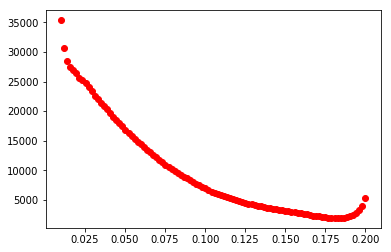

In [458]:
plt.plot(etArr, mse, 'ro')
plt.show()

In [460]:
etaOptima = etArr[mse.index(min(mse))]
etaOptima

0.18272727272727274

Como podemos ver, la variable eta optimiza la función de MSE aproximadamente al rededor de 0.18 (el resultado exacto varía pues la técnica es iterativa y los coeficientes se inicializan de manera aleatoria cada vez que se corre, además esta solución se obtiene de un modelo discreto y no analítico y continuo pero la aproximación es suficientemente buena)

Ahora, podemos hacer lo mismo respecto a lambda y fijamos a eta como esta óptima que encontramos.

In [491]:
lambdArr = np.linspace(0.00001,1.2,1000)
mse = []
for i in range(len(lambdArr)):
    coefs = train(X_trainM, Y_trainM, etaOptima,lambdArr[i])
    predicted = predict(coefs,X_trainM)
    mse.append(mean_squared_error(Y_trainM, predicted))

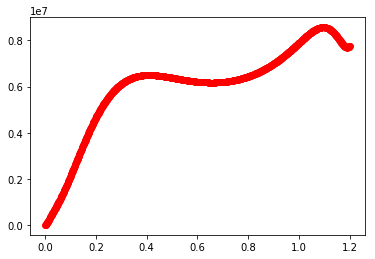

In [492]:
plt.plot(lambdArr, mse, 'ro')
plt.show()

In [493]:
lambdaOptima = lambdArr[mse.index(min(mse))]
lambdaOptima

1.0000000000000001e-05

Resulta que para cualquier valor de lambda mayor a cero explorado en este rango, el valor de MSE aumenta. (Para valores más grandes que 1.2 de lambda la función se dispara y crece rápido, por lo que no se graficó un rango más amplio)